# FINAL PROJECT - DATA PRE-PROCESSING 

## Exercise 1 - MADRID OPEN DATA

For this exploratory analysis (EDA), we are going to work from an open data portal (Open Data), since in this way we can guarantee that the data is real.

On this occasion, we will work with data on "Traffic fines", that is, infractions committed by drivers in the city of Madrid. All the dataset information can be found at the following link:
https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCMfxvgnet50default00VgnVCM17100default

As we can see, the data has been published since 2014, for our analysis, we will take the last full year available, this time all of 2020. Within the last link we can see a detailed description of the information contained in the data, in our case we have information of all the traffic fines that the Madrid City Council processes each month. For reasons related to data protection, the variables report only the infraction and it is prohibited to carry out personal re-identification of the information of the offenders.

We see that the data available for download and consultation are divided into:
* Year month
    * Detail: Download file in .csv
    * Grouped-excluded: Download file in .csv
  
For our case study we are only going to download the files with the .csv extension that come from the "Detail" category of the year 2020.

### Feature Information

As we have seen, the data frame contains 14 variables that have the following meaning:
* __LUGAR__: Location where the penalty occurred.
* __MES + ANIO + HORA__: Date on which the driver was sanctioned.
* __IMP_BOL__: Amount of the penalty
* __DESCUENTO__: Reduction on the price of the infraction (50% - Provided that it is paid within the period of time established in the Road Safety Law), if it is considered that it may have a reduction.
* __PUNTOS__: Number of points that the sanction carries on the offender's driving license.
* __DENUNCIANTE__: Agent of the public body in charge of the regulation of the circulation of the Community of Madrid that imposes the complaint to the offender.
* __HECHO_BOL__: Reason or cause for which the driver is sanctioned.
* __VEL_LIMITE__: Maximum allowed speed of the road on which the driver was traveling when committing the offence.
* __VEL_CIRCULA__: Speed at which the driver was traveling the road in which he has been sanctioned.
* __COORDENADA_X__: Geographical point (X) that identifies the offender in offenses derived from passing a traffic light in the red phase, not respecting the signs on a restricted or reserved traffic lane or accessing Madrid Central without authorization.
* __COORDENADA_Y__: Geographical point (Y) that identifies the offender in offenses derived from passing a traffic light in the red phase, not respecting the signs on a restricted or reserved traffic lane or accessing Madrid Central without authorization.


### OBJECTIVES

Having these datasets and their variables is requested:
* 1. Join the twelve dataframes from January to December into a single dataframe. Shows the total shape of the resulting dataframe.
* 2. As such, we are not going to work with geographic data, delete the __COORDENADA_X__ and __COORDENADA_Y__ columns.
* 3. Check the unique values of the variables, there are some of them that do not have unique values, so they are constants, is it worth having them in the dataframe?
* 4. It seems that the __VEL_LIMITE__ and __VEL_CIRCULA__ columns have empty values, this is because if the infraction was not caused by exceeding any speed limit, this value appears empty, change all the anomalies you detect to null. Hint: Investigate how to use regex with a regular expression like r'^\s*$' in the replace function
* 5. The two columns __VEL_LIMITE__ and __VEL_CIRCULA__ despite being two purely numerical columns, are recognized as "object" type, check the frequency of values, you will see that they are counted as text strings, therefore:
    + 5.1 Change the nulls of the two variables to 0
    + 5.2 Change the type of the variable to numeric
    + 5.3 What is the most repeated speed limit other than zero?
* 6. Generate a new column called DIFFERENCE_KMH that is the result of subtracting from each value of the speed at which the driver was circulating the speed limit at which the infraction occurred, obtain a top 10 of the drivers who exceeded the limits to higher speed.
* 7. Obtain a dataframe filtered by all the complaints that have led to the withdrawal of points (that is, points other than zero). Group the dataframe filtered by the public agent that issues the complaint, which of all the public agents has a higher average point withdrawal?
* 8. Eliminate the decimal part from the hour column then, shows graphically in which hours more fines have occurred.
* 9. Graphically shows the fines made during the months of 2020. Knowing that the confinement in Spain began in March of that year, is the effect of the pandemic noticeable?
* 10. Shows the number of infractions (without accumulated frequency), of each of the public agents based on the classification of the infraction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

* 1. Join the twelve dataframes from January to December into a single dataframe. Shows the total shape of the resulting dataframe.

In [2]:
# Create an empty dataframe
df = pd.DataFrame()

lista_csv_multas = []

# Reading each dataframe
for i in range(1, 13):
    if i < 10:
        
        data = pd.read_csv(str("20200")+str(i)+str("_detalle.csv"), delimiter=";", encoding="latin1", header=0, names=
                           ['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
                            'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
                            'COORDENADA_X', 'COORDENADA_Y']
                          )
        print("Reading - File: ", str("20200")+str(i)+str("_detalle.csv"))
    else:
        data = pd.read_csv(str("2020")+str(i)+str("_detalle.csv"), delimiter=";", encoding="latin1", header=0, names=
                           ['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
                            'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
                            'COORDENADA_X', 'COORDENADA_Y']
                          )
        print("Reading - File: ", str("2020")+str(i)+str("_detalle.csv"))
        
    lista_csv_multas.append(data)
    
# Resent index and generate the final dataframe
df = pd.concat(lista_csv_multas).reset_index(drop=True, inplace=False)

df.columns

Reading - File:  202001_detalle.csv
Reading - File:  202002_detalle.csv
Reading - File:  202003_detalle.csv
Reading - File:  202004_detalle.csv
Reading - File:  202005_detalle.csv
Reading - File:  202006_detalle.csv


C:\Users\JMMoreno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Reading - File:  202007_detalle.csv
Reading - File:  202008_detalle.csv
Reading - File:  202009_detalle.csv
Reading - File:  202010_detalle.csv
Reading - File:  202011_detalle.csv
Reading - File:  202012_detalle.csv


Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y'],
      dtype='object')

In [3]:
# To not have a big object in memory, delete it
del(lista_csv_multas)

try:
    lista_csv_multas
except NameError:
    print("List deletec")

List deletec


In [4]:
print("Final data about Madrid traffic penalties, rows {} columns {} ".format(df.shape[0], df.shape[1]))

Final data about Madrid traffic penalties, rows 1993304 columns 14 


* 2. As such, we are not going to work with geographic data, delete the __COORDENADA_X__ and __COORDENADA_Y__ columns.

In [5]:
df.drop(["COORDENADA_X", "COORDENADA_Y"], 1, inplace=True)

C:\Users\JMMoreno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
df.shape

(1993304, 12)

* 3. Check the unique values of the variables, there are some of them that do not have unique values, so they are constants, is it worth having them in the dataframe?

In [7]:
for column in df.columns:
    print(column, ' --> ', len(df[column].value_counts()))

CALIFICACION  -->  3
LUGAR  -->  99908
MES  -->  12
ANIO  -->  1
HORA  -->  1440
IMP_BOL  -->  10
DESCUENTO  -->  1
PUNTOS  -->  5
DENUNCIANTE  -->  4
HECHO-BOL  -->  1332
VEL_LIMITE  -->  12
VEL_CIRCULA  -->  207


In [8]:
df.drop(["DESCUENTO", "ANIO"], 1, inplace=True)

C:\Users\JMMoreno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


* 4. It seems that the __VEL_LIMITE__ and __VEL_CIRCULA__ columns have empty values, this is because if the infraction was not caused by exceeding any speed limit, this value appears empty, change all the anomalies you detect to null Hint: Investigate how regex a regular expression like r'^\s*$' in the replace function

In [9]:
df.VEL_LIMITE.value_counts().head(3)

       1549853
 70     259747
 90      92510
Name: VEL_LIMITE, dtype: int64

In [10]:
df.VEL_CIRCULA.value_counts().head(3)

       1549853
 74      43674
 75      36100
Name: VEL_CIRCULA, dtype: int64

In [11]:
df.replace(r'^\s*$', np.NaN, regex=True, inplace=True)

In [12]:
df.isnull().sum()

CALIFICACION          0
LUGAR                 0
MES                   0
HORA                  0
IMP_BOL               0
PUNTOS                0
DENUNCIANTE           0
HECHO-BOL             0
VEL_LIMITE      1549853
VEL_CIRCULA     1549853
dtype: int64

In [13]:
df.isnull().sum() / len(df)*100

CALIFICACION     0.000000
LUGAR            0.000000
MES              0.000000
HORA             0.000000
IMP_BOL          0.000000
PUNTOS           0.000000
DENUNCIANTE      0.000000
HECHO-BOL        0.000000
VEL_LIMITE      77.752967
VEL_CIRCULA     77.752967
dtype: float64

In [14]:
df.VEL_CIRCULA.value_counts().head(3)

 74    43674
 75    36100
 76    30962
Name: VEL_CIRCULA, dtype: int64

* 5. The two columns __VEL_LIMITE__ and __VEL_CIRCULA__ despite being two purely numerical columns, are recognized as "object" type, check the frequency of values, you will see that they are counted as text strings, therefore:
    + 5.1 Change the nulls of the two variables to 0
    + 5.2 Change the type of the variable to numeric
    + 5.3 What is the most repeated speed limit other than zero?

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993304 entries, 0 to 1993303
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CALIFICACION  object 
 1   LUGAR         object 
 2   MES           int64  
 3   HORA          float64
 4   IMP_BOL       float64
 5   PUNTOS        int64  
 6   DENUNCIANTE   object 
 7   HECHO-BOL     object 
 8   VEL_LIMITE    object 
 9   VEL_CIRCULA   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 152.1+ MB


In [16]:
df.VEL_LIMITE.value_counts()

 70    259747
 90     92510
 50     72859
70       6574
 80      3688
 40      2472
 60      2188
90       1892
 30      1343
50        177
 20         1
Name: VEL_LIMITE, dtype: int64

In [17]:
df.VEL_CIRCULA.fillna("0", inplace=True)
df.VEL_CIRCULA = df.VEL_CIRCULA.astype(int)

In [18]:
df.VEL_LIMITE.fillna("0", inplace=True)
df.VEL_LIMITE = df.VEL_LIMITE.astype(int)

In [19]:
df.VEL_LIMITE[df.VEL_LIMITE != 0].value_counts().head(2)

70    266321
90     94402
Name: VEL_LIMITE, dtype: int64

In [20]:
df.VEL_CIRCULA[df.VEL_CIRCULA != 0].value_counts().head(2)

74    44737
75    37006
Name: VEL_CIRCULA, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993304 entries, 0 to 1993303
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CALIFICACION  object 
 1   LUGAR         object 
 2   MES           int64  
 3   HORA          float64
 4   IMP_BOL       float64
 5   PUNTOS        int64  
 6   DENUNCIANTE   object 
 7   HECHO-BOL     object 
 8   VEL_LIMITE    int32  
 9   VEL_CIRCULA   int32  
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 136.9+ MB


* 6. Generate a new column called DIFFERENCE_KMH that is the result of subtracting from each value of the speed at which the driver was circulating the speed limit at which the infraction occurred, obtain a top 10 of the drivers who exceeded the limits to higher speed.

In [22]:
df["DIFFERENCE_KMH"] = df.VEL_CIRCULA - df.VEL_LIMITE

In [23]:
df.sort_values(by="DIFFERENCE_KMH", ascending=False).head(10)

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
448783,GRAVE,"M 30 FT KM 4,150 CR 1",3,23.43,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
1293088,GRAVE,"M 30 XC KM 10,300 CR 3",9,23.25,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
1671450,GRAVE,"M 30 KM 6,700 CR 3 CALZADA 1",11,7.53,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
1293087,GRAVE,"M 30 KM 7,800 CALZADA 2",9,1.11,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
293196,GRAVE,M 30 KM 27 DECRECIENTE C 2,2,4.57,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
1480910,GRAVE,M 30 KM 27 CARRIL 2 CALZADA 2,10,2.11,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
479076,GRAVE,"M 30 FT KM 4,150 CR 4",3,20.23,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,139,69
293195,GRAVE,"M 30 FT PK 4,150 CR 4",2,14.06,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,139,69
913637,GRAVE,"M 30 KM 0,500 CALZADA 1",7,5.26,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
1480909,GRAVE,"M 30 KM 6,700 CALZADA 1 CR 3",10,2.06,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69


* 7. Obtain a dataframe filtered by all the complaints that have led to the withdrawal of points (that is, points other than zero). Group the dataframe filtered by the public agent that issues the complaint, which of all the public agents has a higher average point withdrawal?

In [24]:
df_no_points = df[(df.PUNTOS != 0)].copy()

In [25]:
df_no_points.groupby(["DENUNCIANTE"]).mean()["PUNTOS"]

DENUNCIANTE
AGENTES DE MOVILIDAD    3.869120
POLICIA MUNICIPAL       3.110089
Name: PUNTOS, dtype: float64

* 8. Eliminate the decimal part from the hour column then, shows graphically in which hours more penalties have occurred.

In [26]:
df.HORA = df.HORA.astype(int)

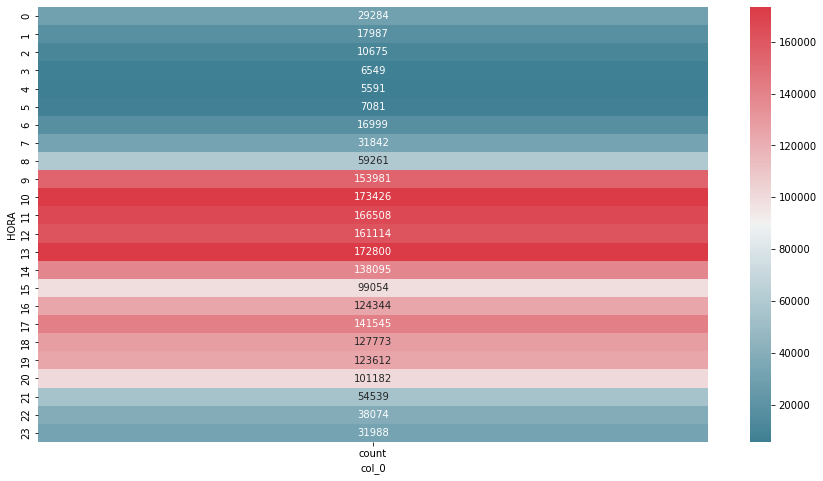

In [27]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.crosstab(index=df["HORA"], columns = "count"), cmap=cmap, annot=True, fmt="d")
plt.show()

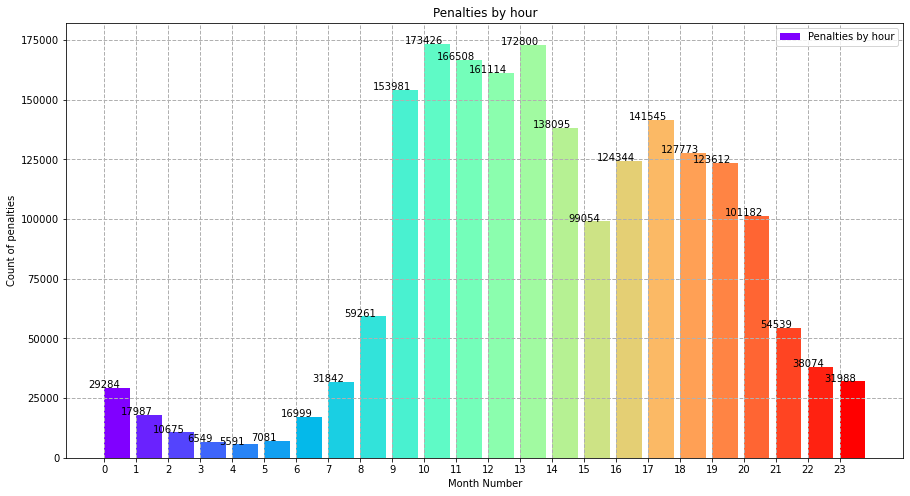

In [28]:
from matplotlib.pyplot import cm

fig, ax = plt.subplots(1,1, figsize=(15,8))

groups = df.groupby(["HORA"]).count()["CALIFICACION"]

ax.bar(groups.keys(), groups.values, label = 'Penalties by hour', align='edge',  
       color = cm.rainbow(np.linspace(0, 1, len(groups.keys()))))
for i in range(len(groups.values)):
    ax.text(i, groups.values[i], groups.values[i], horizontalalignment='center')
    
    
plt.xlabel('Month Number')
plt.ylabel('Count of penalties')
plt.legend(loc='upper right')
plt.xticks(groups.keys())
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('Penalties by hour')
plt.show()

* 9. Graphically shows the penalties made during the months of 2020. Knowing that the lookdown in Spain began in March of that year, is the effect of the pandemic noticeable?

In [29]:
months = df.MES.value_counts().sort_index()

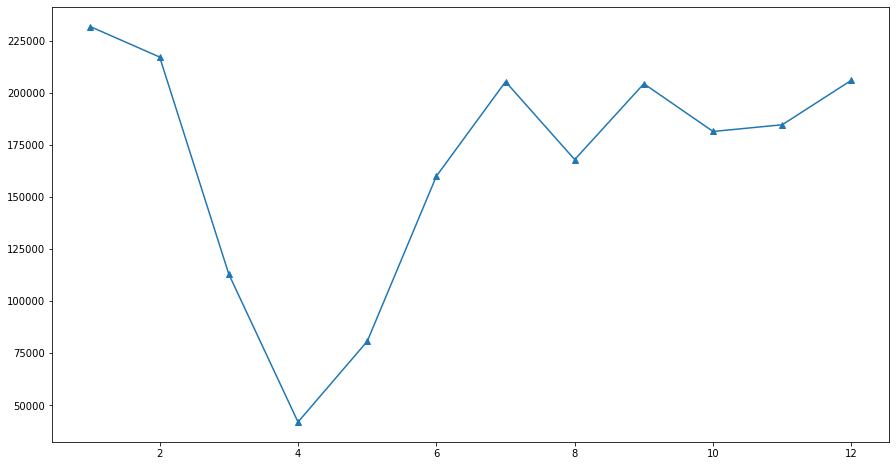

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
plt.plot(months.index, months.values, marker = "^")
plt.show()

<BarContainer object of 12 artists>

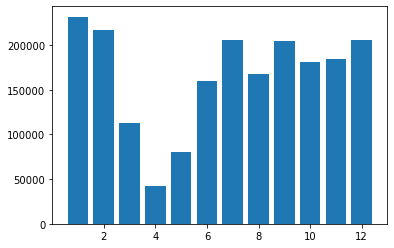

In [31]:
plt.bar(months.index, months.values)

* 10. Shows the number of infractions (without accumulated frequency), of each of the public agents based on the classification of the infraction

<AxesSubplot:xlabel='CALIFICACION', ylabel='count'>

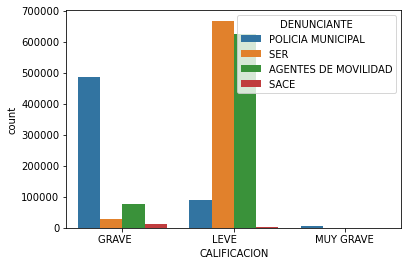

In [32]:
sns.countplot(data = df, x = "CALIFICACION", hue = df.DENUNCIANTE, orient="h")

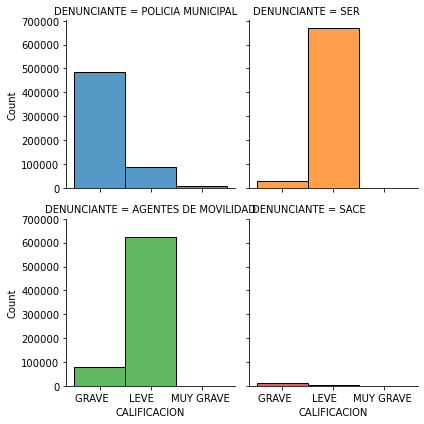

In [33]:
import seaborn as sns

g = sns.FacetGrid(df, col='DENUNCIANTE', hue = "DENUNCIANTE", height=3, col_wrap = 2)
g.map(sns.histplot, "CALIFICACION")